# Notebook
This notebook is used for visualizing the results of the grid search over the EEGDataExtractor parameters 

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

In [95]:
def plot_param_vs_metric(df, param, metric="final_loss"):    
    
    grouped = df.groupby(param, as_index=False)[metric].mean().reset_index().sort_values(param, ascending=True)
    
    fig, ax = plt.subplots()
    ax.plot(grouped[param], grouped[metric], marker="o")
    ax.set_title(f"{param} vs {metric}")
    plt.xlabel(param)
    plt.ylabel(metric)
    plt.show()

In [2]:
df = pd.read_json("eeg_extractor_grid_search.json")

In [3]:
df.head()

,params,final_loss,centroid_train_acc,centroid_test_acc,final_train_acc,final_train_eer,final_train_f1,final_test_acc,final_test_f1,final_test_eer
0,"{'hfreq': 50.0, 'lfreq': 1.0, 'notch_filter': ...",1.723375,0.485632,0.428879,0.759212,0.242996,0.209622,0.572581,0.343386,0.426523
1,"{'hfreq': 50.0, 'lfreq': 1.0, 'notch_filter': ...",1.581187,0.456358,0.396552,0.752627,0.253772,0.201398,0.576165,0.347319,0.422939
2,"{'hfreq': 50.0, 'lfreq': 1.0, 'notch_filter': ...",0.822049,0.727011,0.538793,0.927472,0.076509,0.572378,0.613501,0.365623,0.379928
3,"{'hfreq': 50.0, 'lfreq': 1.0, 'notch_filter': ...",0.860129,0.720546,0.500718,0.912124,0.085309,0.526407,0.623357,0.362243,0.378136
4,"{'hfreq': 50.0, 'lfreq': 5.0, 'notch_filter': ...",0.067142,0.897989,0.463362,0.998548,0.001616,0.989622,0.660693,0.400794,0.335125


In [18]:
expanded = pd.json_normalize(df["params"])

In [28]:
df2 = pd.concat([df,expanded], axis=1)

In [29]:
df2.head()

,params,final_loss,centroid_train_acc,centroid_test_acc,final_train_acc,final_train_eer,final_train_f1,final_test_acc,final_test_f1,final_test_eer,hfreq,lfreq,notch_filter,tmax,tmin
0,"{'hfreq': 50.0, 'lfreq': 1.0, 'notch_filter': ...",1.723375,0.485632,0.428879,0.759212,0.242996,0.209622,0.572581,0.343386,0.426523,50.0,1.0,[50],1.0,0.0
1,"{'hfreq': 50.0, 'lfreq': 1.0, 'notch_filter': ...",1.581187,0.456358,0.396552,0.752627,0.253772,0.201398,0.576165,0.347319,0.422939,50.0,1.0,[50],1.0,-0.5
2,"{'hfreq': 50.0, 'lfreq': 1.0, 'notch_filter': ...",0.822049,0.727011,0.538793,0.927472,0.076509,0.572378,0.613501,0.365623,0.379928,50.0,1.0,[50],3.0,0.0
3,"{'hfreq': 50.0, 'lfreq': 1.0, 'notch_filter': ...",0.860129,0.720546,0.500718,0.912124,0.085309,0.526407,0.623357,0.362243,0.378136,50.0,1.0,[50],3.0,-0.5
4,"{'hfreq': 50.0, 'lfreq': 5.0, 'notch_filter': ...",0.067142,0.897989,0.463362,0.998548,0.001616,0.989622,0.660693,0.400794,0.335125,50.0,5.0,[50],1.0,0.0


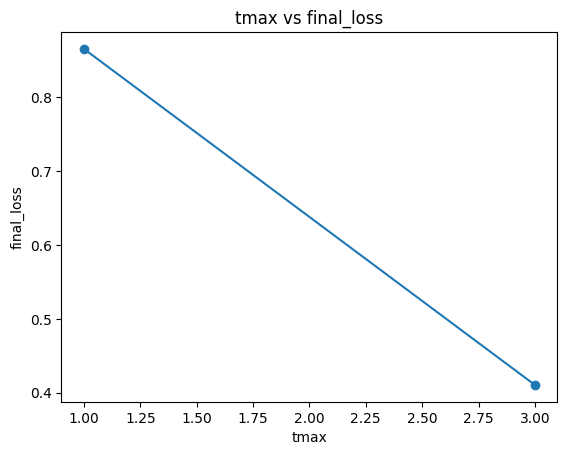

In [79]:
plot_param_vs_metric(df2, "tmax","final_loss")

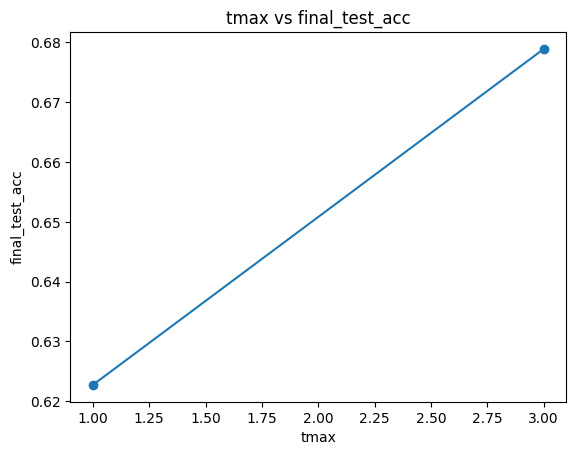

In [81]:
plot_param_vs_metric(df2, "tmax", "final_test_acc")

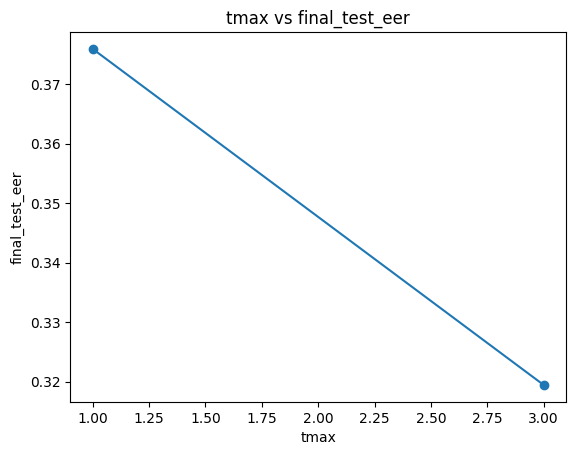

In [82]:
plot_param_vs_metric(df2, "tmax","final_test_eer")

większy tmax daje efekt na plus
- final loss mniejszy o ~0.4
- final_test_acc większy o ~0.06
- final_test_eer mniejszy o ~0.05

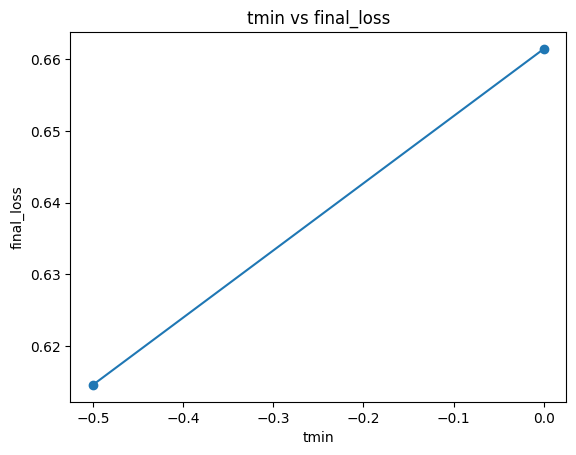

In [92]:
plot_param_vs_metric(df2, "tmin","final_loss")

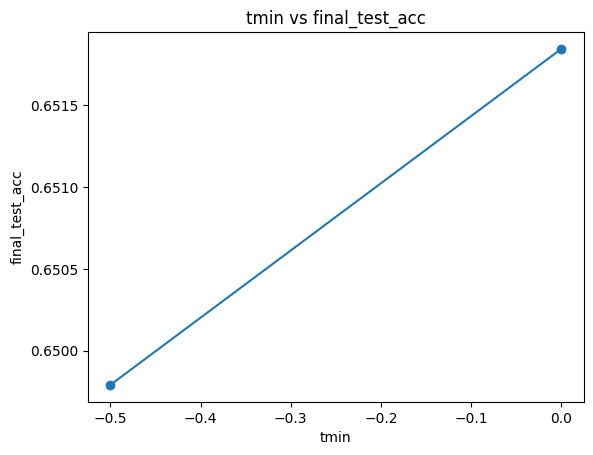

In [93]:
plot_param_vs_metric(df2, "tmin", "final_test_acc")

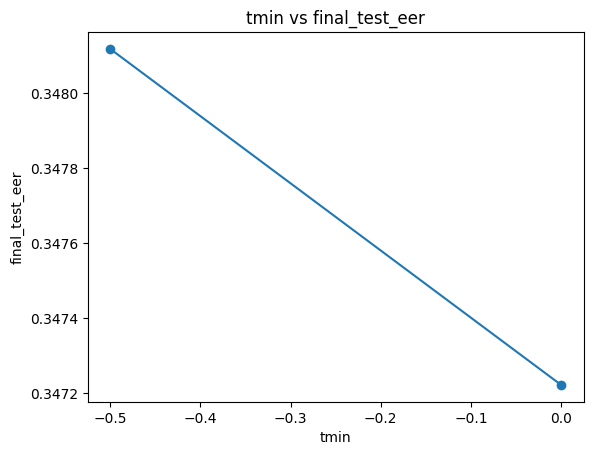

In [94]:
plot_param_vs_metric(df2, "tmin","final_test_eer")

większy tmin daje efekty mieszane
- (-)większy final loss o ~0.04 
- (+)większy final_test_acc o ~0.0015
- (+)mniejszy final_test_eer o ~0.0008

różnice na plus są bardzo małe więc mogły wystąpić przez przypadek, wzrost final_loss wydaje się bardziej miarodajny, ale warto sprawdzić

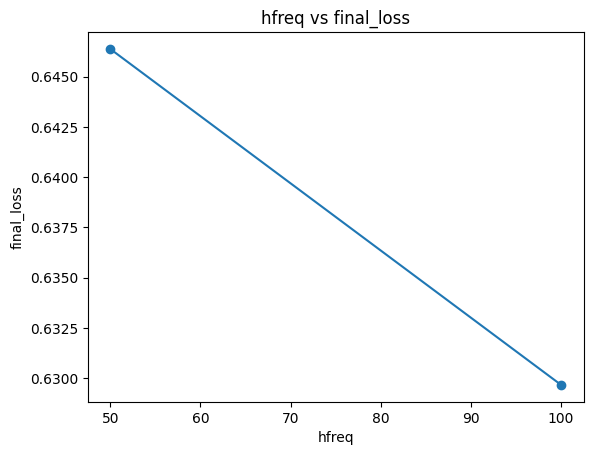

In [86]:
plot_param_vs_metric(df2, "hfreq","final_loss")

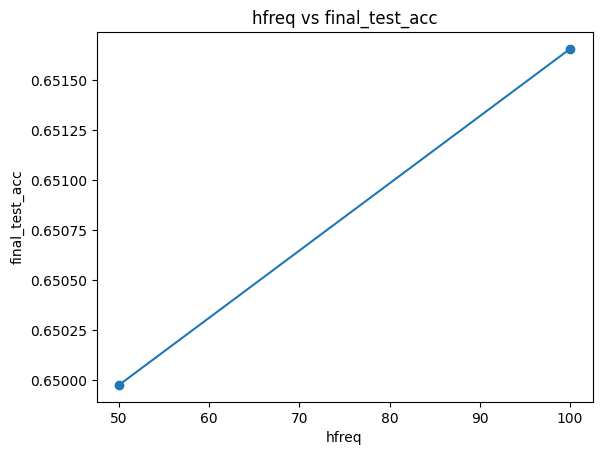

In [87]:
plot_param_vs_metric(df2, "hfreq", "final_test_acc")

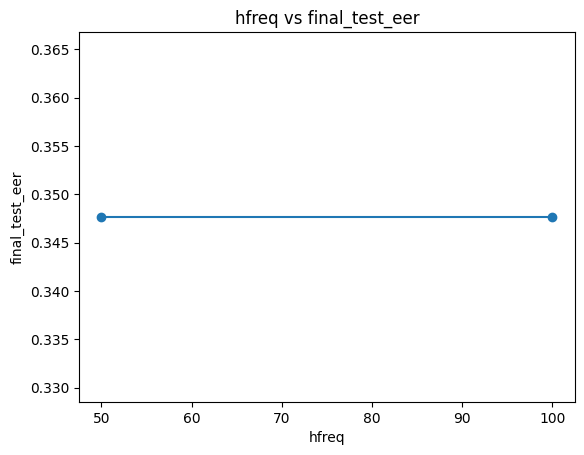

In [88]:
plot_param_vs_metric(df2, "hfreq","final_test_eer")

większy hfreq daje efekty delikatnie pozytywne
- (+) final_loss mniejszy o ~0.015
- (+) final_test_acc większy o ~0.0015 
- (.) final_test_eer bez zmian

bardzo małe różnice, lepiej najpierw testować coś innego

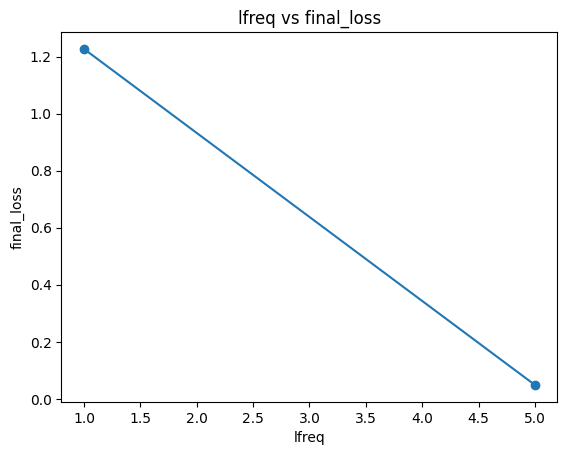

In [89]:
plot_param_vs_metric(df2, "lfreq","final_loss")

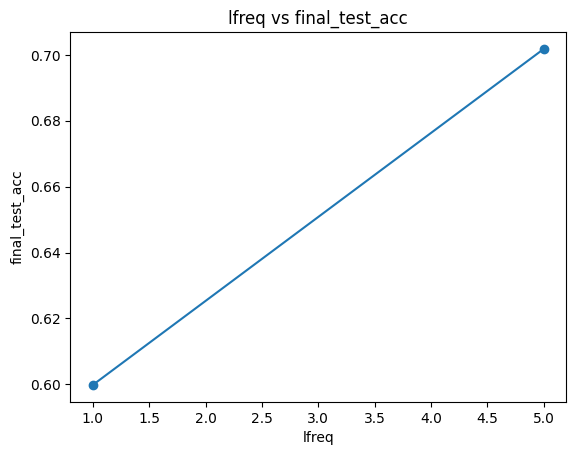

In [90]:
plot_param_vs_metric(df2, "lfreq", "final_test_acc")

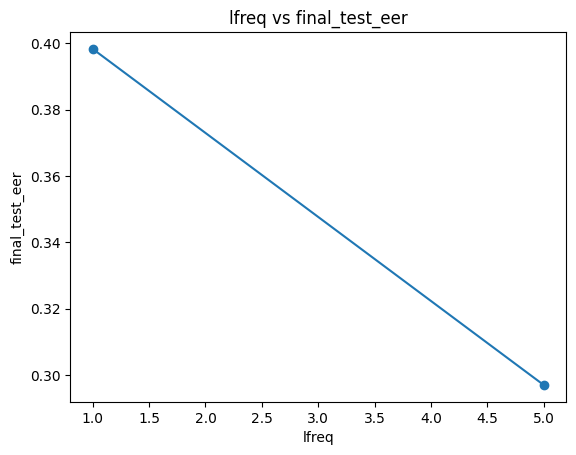

In [91]:
plot_param_vs_metric(df2, "lfreq","final_test_eer")

lfreq daje efekty znacząco pozytywne
- (+) final_loss mniejszy o ~1.1
- (+) final_test_acc większy o ~0.1
- (+) final_test_eer mniejszy o ~0.1

Najbardziej się opłaca testować
1. lfreq
2. tmax

bo pozostałe parametry się wachają o bardzo małe wartości

## Second GridSearch

Now we did gridsearch only on tmax and lfreq


In [97]:
dfv2 = pd.read_json("eeg_extractor_grid_search_v2.json")

In [100]:
expanded = pd.json_normalize(dfv2["params"])

In [101]:
expanded

,hfreq,lfreq,notch_filter,tmax,tmin
0,100.0,3.0,[50],2.0,0.0
1,100.0,3.0,[50],5.0,0.0
2,100.0,3.0,[50],7.0,0.0
3,100.0,7.0,[50],2.0,0.0
4,100.0,7.0,[50],5.0,0.0
5,100.0,7.0,[50],7.0,0.0
6,100.0,10.0,[50],2.0,0.0
7,100.0,10.0,[50],5.0,0.0
8,100.0,10.0,[50],7.0,0.0


In [102]:
dfv2 = pd.concat([dfv2,expanded], axis=1)

In [104]:
dfv2 = pd.concat([df2, dfv2], axis=0)

In [105]:
dfv2

,params,final_loss,centroid_train_acc,centroid_test_acc,final_train_acc,final_train_eer,final_train_f1,final_test_acc,final_test_f1,final_test_eer,hfreq,lfreq,notch_filter,tmax,tmin
0,"{'hfreq': 50.0, 'lfreq': 1.0, 'notch_filter': ...",1.723375,0.485632,0.428879,0.759212,0.242996,0.209622,0.572581,0.343386,0.426523,50.0,1.0,[50],1.0,0.0
1,"{'hfreq': 50.0, 'lfreq': 1.0, 'notch_filter': ...",1.581187,0.456358,0.396552,0.752627,0.253772,0.201398,0.576165,0.347319,0.422939,50.0,1.0,[50],1.0,-0.5
2,"{'hfreq': 50.0, 'lfreq': 1.0, 'notch_filter': ...",0.822049,0.727011,0.538793,0.927472,0.076509,0.572378,0.613501,0.365623,0.379928,50.0,1.0,[50],3.0,0.0
3,"{'hfreq': 50.0, 'lfreq': 1.0, 'notch_filter': ...",0.860129,0.720546,0.500718,0.912124,0.085309,0.526407,0.623357,0.362243,0.378136,50.0,1.0,[50],3.0,-0.5
4,"{'hfreq': 50.0, 'lfreq': 5.0, 'notch_filter': ...",0.067142,0.897989,0.463362,0.998548,0.001616,0.989622,0.660693,0.400794,0.335125,50.0,5.0,[50],1.0,0.0
5,"{'hfreq': 50.0, 'lfreq': 5.0, 'notch_filter': ...",0.082277,0.906430,0.489224,0.998324,0.001796,0.988510,0.679211,0.418152,0.315412,50.0,5.0,[50],1.0,-0.5
6,"{'hfreq': 50.0, 'lfreq': 5.0, 'notch_filter': ...",0.018823,0.905711,0.596983,0.999828,0.000180,0.999013,0.730287,0.493696,0.268817,50.0,5.0,[50],3.0,0.0
7,"{'hfreq': 50.0, 'lfreq': 5.0, 'notch_filter': ...",0.016009,0.958333,0.620690,0.999663,0.000359,0.999191,0.744026,0.507289,0.254480,50.0,5.0,[50],3.0,-0.5
8,"{'hfreq': 100.0, 'lfreq': 1.0, 'notch_filter':...",1.738048,0.452227,0.420977,0.741768,0.254849,0.200450,0.575269,0.341194,0.426523,100.0,1.0,[50],1.0,0.0
9,"{'hfreq': 100.0, 'lfreq': 1.0, 'notch_filter':...",1.553944,0.447198,0.349856,0.759122,0.237787,0.209302,0.580944,0.339324,0.417563,100.0,1.0,[50],1.0,-0.5


tmax

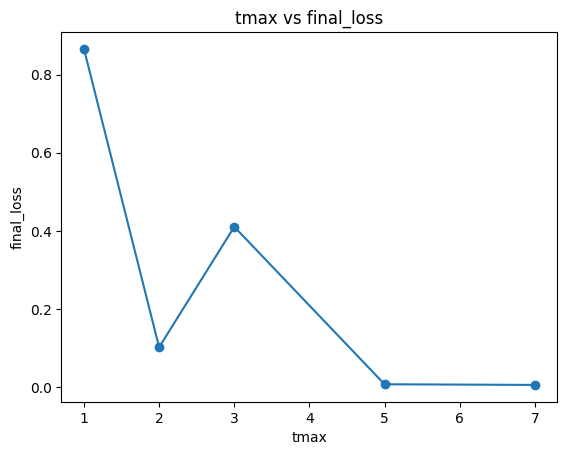

In [106]:
plot_param_vs_metric(dfv2, "tmax","final_loss")

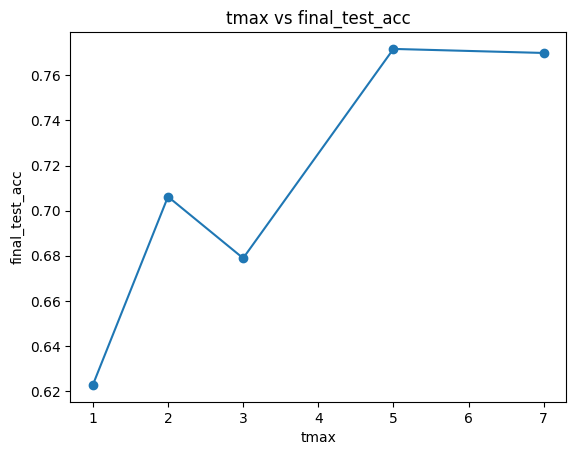

In [107]:
plot_param_vs_metric(dfv2, "tmax","final_test_acc")

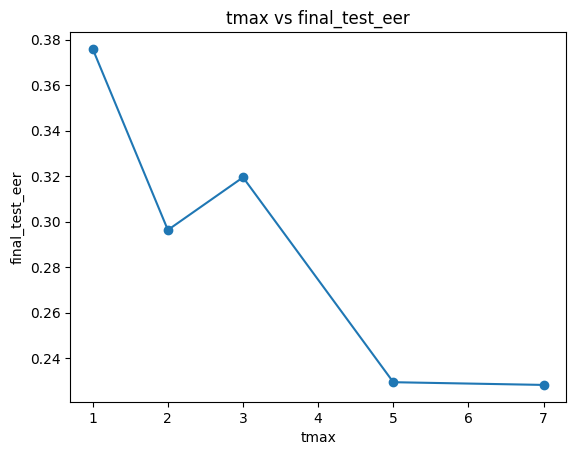

In [108]:
plot_param_vs_metric(dfv2, "tmax","final_test_eer")

best value for tmax seems to be around 5

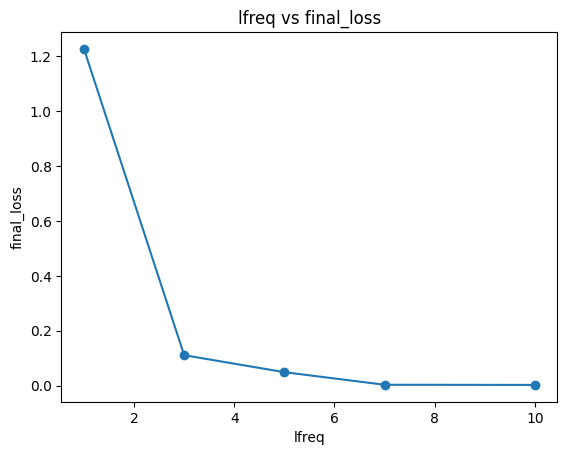

In [109]:
plot_param_vs_metric(dfv2, "lfreq","final_loss")

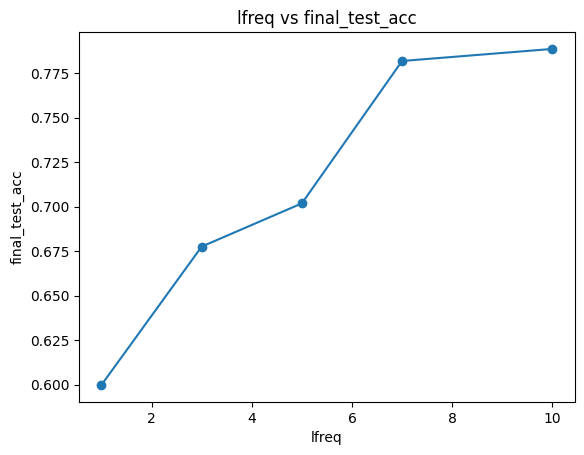

In [110]:
plot_param_vs_metric(dfv2, "lfreq","final_test_acc")

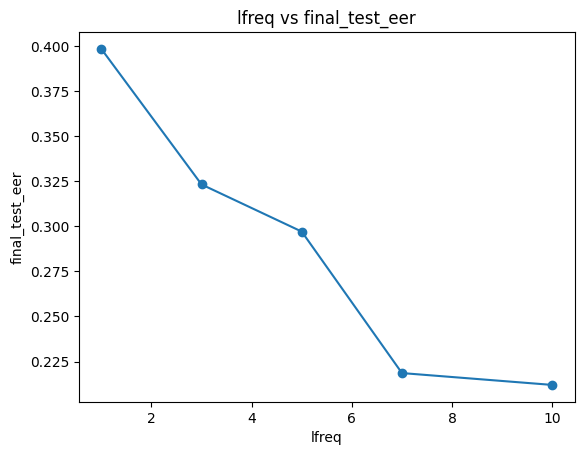

In [111]:
plot_param_vs_metric(dfv2, "lfreq","final_test_eer")

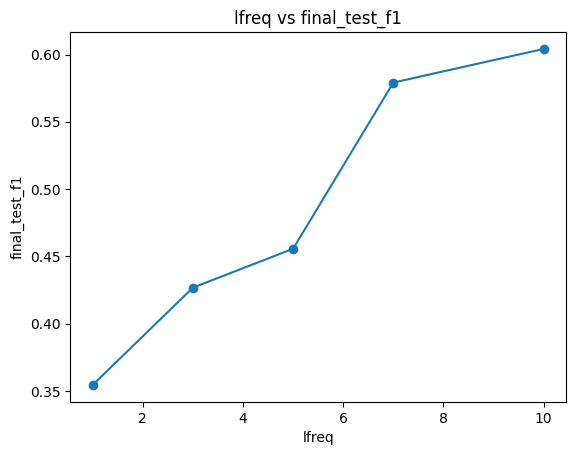

In [112]:
plot_param_vs_metric(dfv2, "lfreq","final_test_f1")

Interestingly for lfreq final loss seems to drop dramatically only for lfreq=3, but other metrics improve up to about lfreq=7

With this the reasonable choice for
- tmax is 5.0
- lfreq is 7.0